# Keeping Track of Vehicle x and y

Now that you know how to solve trigonometry problems, you can keep track of a vehicle's $x$ and $y$ coordinates as it moves in any direction. 

The goal of this lesson is for you to implement a few methods in a `Vehicle` class. Once complete, your code will be used like this:

```python
# instantiate vehicle
v = Vehicle()

# drive forward 10 meters
v.drive_forward(10)

# turn left in 10 increments of 9 degrees each.
for _ in range(10):
    v.turn(9.0)
    v.drive_forward(1)

v.drive_forward(10)

v.show_trajectory()
```

and this final call to `show_trajectory` should produce a graph that looks like this:

![](https://d17h27t6h515a5.cloudfront.net/topher/2017/December/5a3184b7_xy-traj/xy-traj.png)

If, instead of calling 

```python
v.show_trajectory()
```

we had written:

```python
print(v.history)
```

we would have seen a list of `(x,y)` tuples representing the vehicle's history that looks like this:

```python
[(0.0, 0.0),
 (10.0, 0.0),
 (10.988, 0.156),
 (11.939, 0.465),
 (12.830, 0.919),
 (13.639, 1.507),
 (14.346, 2.214),
 (14.934, 3.023),
 (15.388, 3.914),
 (15.697, 4.865),
 (15.853, 5.853),
 (15.853, 6.853)]
```

Note that it's this `history` data that is used to plot the points in `show_trajectory`.

In [35]:
import numpy as np
from math import sin, cos, pi
from matplotlib import pyplot as plt

# TODO - Complete the methods in the vehicle class. If the 
#        requirements of any method are unclear, look at 
#        the testing code in testing.py (you'll need to
#        click on the "Jupyter" logo in the top left and
#        then open testing.py)
#
#        If you really get stuck, take a look at the 
#        solution code in the next segment.

class Vehicle:
    def __init__(self):
        self.x       = 0.0 # meters
        self.y       = 0.0
        self.heading = 0.0 # radians
        self.history = []
        
    def drive_forward(self, displacement):
        """
        Updates x and y coordinates of vehicle based on 
        heading and appends previous (x,y) position to
        history.
        """
        new_x       = self.x+np.cos(self.heading)*displacement # meters
        new_y       = self.y+np.sin(self.heading)*displacement
        
        self.history.append((self.x, self.y))
        
        self.x       = self.x+np.cos(self.heading)*displacement # meters
        self.y       = self.y+np.sin(self.heading)*displacement
    
    def set_heading(self, heading_in_degrees):
        """
        Sets the current heading (in radians) to a new value
        based on heading_in_degrees. Vehicle heading is always
        between 0 and 2 * pi.
        """
        assert(-180 <= heading_in_degrees <= 180)
        rads = (heading_in_degrees * pi / 180) % (2*pi)
        self.heading = rads
    
    def turn(self, angle_in_degrees):
        """
        Changes the vehicle's heading by angle_in_degrees. Vehicle 
        heading is always between 0 and 2 * pi.
        """
        self.set_heading(np.rad2deg(self.heading)+angle_in_degrees)
    
    def show_trajectory(self):
        """
        Creates a scatter plot of vehicle's trajectory.
        """
        plt.plot(self.history)

In [36]:
# Use this testing code to check your code for correctness.
from testing import test_drive_forward, test_set_heading

test_set_heading(Vehicle)
test_drive_forward(Vehicle)

Your set_heading function looks good!
Congratulations! Your vehicle's drive_forward method works


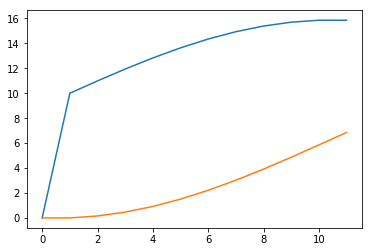

In [37]:
# You'll have to "test" your show_trajectory method 
# visually. Run the code below and see if the plot that's
# produced looks similar to the plot at the bottom of 
# this notebook.

# instantiate vehicle
v = Vehicle()

# drive forward 10 meters
v.drive_forward(10)

# turn left in 10 increments of 9 degrees each.
for _ in range(10):
    v.turn(9.0)
    v.drive_forward(1)

v.drive_forward(10)

v.show_trajectory()

Reference plot from solution code 
![](https://d17h27t6h515a5.cloudfront.net/topher/2017/December/5a3184b7_xy-traj/xy-traj.png)